In [6]:
%pylab inline
from galaxy2galaxy import problems
from astropy.visualization import make_lupton_rgb
import tensorflow as tf
Modes = tf.estimator.ModeKeys

Populating the interactive namespace from numpy and matplotlib


In [7]:
# To list the problems currently available in G2G
problems.available()

['attrs2img_cosmos',
 'attrs2img_cosmos32',
 'img2img_cosmos',
 'img2img_cosmos32',
 'img2img_hsc',
 'img2img_hsc_anomaly']

In [8]:
# Let's create an instance of the hsc_problem
hsc = problems.problem('img2img_hsc_anomaly')

# And extract the training dataset, assuming g2g-datagen has already
# been run using:
# $ g2g-datagen --problem=hsc_problem --data-dir=data/hsc_problem --tmp_dir=hsc_tmp
dset = hsc.dataset(Modes.TRAIN, data_dir='../data/hsc_anomaly')
dset = dset.batch(25)

In [9]:
# Build an iterator over this dataset, and extract a batch
it = dset.make_one_shot_iterator().get_next()

sess = tf.Session()
batch = sess.run(it)

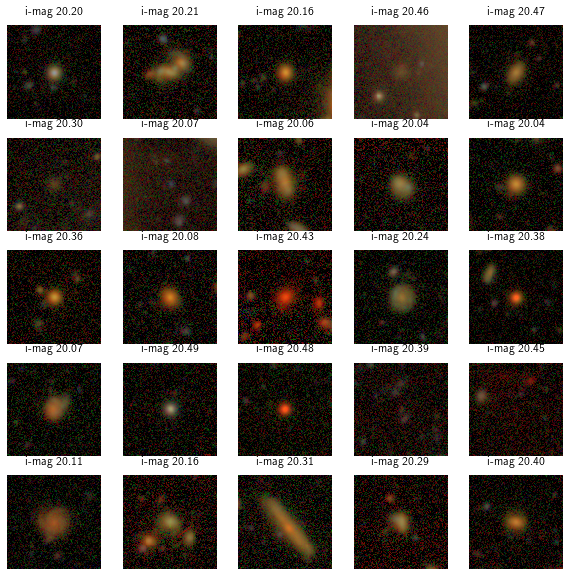

In [10]:
figure(figsize=(10,10))
for i in range(25):
    subplot(5,5,i+1)
    title('i-mag %0.2f'%batch['i_cmodel_mag'][i])
    imshow(batch['inputs'][i])
    axis('off')